## Observations and Insights 

Observations:

1) The most obvious observation may come from using linear regression. When we group mice by their (averaged) weights, and see the average voulme of their tumors when on a regimen of Capomulin, the correlation coefficient shows that these two variables are highly correlated, and the R-Squared value shows the strength of regression is quite robust too. This is fairly intuitive, as across the animal kingdom cancers weigh more the more the animal weighs. Tumors tend to scale up. Also interesting to note that when the weights are not averaged, and only one average tumor volume value per recorded weight is used (which results in much fewer data points), the correlation is incredibly strong, nearly 1, and likewise the strength of the regression in that case would be equally strong.

2) Looking at mouse l509, it's interesting to note that there is a stark trend: overall, the longer this mouse is on Capomulin, the lower the tumor volume of its tumor(s) get. However, there are noticeable increases in tumor volume at about 25 days and 35 days, and the tumor(s) grew up until about 20 days into the regimen. It would be helpful to know the exact methodology the scientists employed. What was the dosage of Capomulin, how many times per diem, was the mouse ever allowed to skip a treatment? These are things that we don't know. Looking at the boxplots, it seems that Capomulin is a pretty effective drug, at least compared to other drugs, and of course, this is one singular mouse. It's hard to say with any certainty if this is normally how tumors respond to Capomulin. Does it take multiple weeks before it starts to kill cancer cells, and do the cancer cells usually make brief comebacks at semi regular intervals?

3) Speaking of boxplots, Capomulin and Ramicane are about on equal footing compared to the other drugs. In the summary statistics, it's clear that these two drugs are in a different playing field, with the average tumor(s) on mice taking these drugs are a good 10 mm3 or more smaller than most of the other drugs. However, when examining the data itself, it's intriguing that both Capomulin and Ramicane have a substantial list of outliers. It doesn't appear so looking at the chart, but the calculations don't lie. What's also telling is that for both Capomulin and Ramicane, all of their outliers are above the upper bound; none are below. So this might speak to their effectiveness as drugs, since even with a great number of outliers (none severe enough for the subplots and boxplot functions to mark them) the tumor volumes of their mice were noticeably smaller than for the other drugs at a glance. Infubinol had a large amount of outliers too, but there were many below the lower bound as well as above the upper bound. Ceftamine had almost no outliers. But this isn't surprising. Looking at the median values for tumor volumes in the summary statistics, Capomulin and Ramicane have almost identical values to their means, and are still a good 10 mm3 or more smaller than the competition. This is a very good indicator that their outliers don't matter so much, and that outliers of mice with bigger tumors didn't bring down the overall evidence that these two drugs are better at killing cancer (at least in mice).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combine_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
#not sure how to make the combined data frame output match the sample output
combine_data.sort_values(by=["Mouse ID"], inplace= True)
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1


In [3]:
# Checking the number of mice.
combine_data["Mouse ID"].nunique()
# len function is also an option

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_data = combine_data[["Mouse ID", "Timepoint"]]
duplicates = duplicate_data[["Mouse ID", "Timepoint"]].duplicated(keep=False)
duplicate_data[duplicates]

#checking that mouse g989 has in fact duplicate timepoint values
#checkdata = combine_data.loc[(combine_data["Mouse ID"] == "g989"), :]
#checkdata.sort_values(by="Timepoint", ascending=False)
#indeed mouse g989 has double timepoint values at almost every interval
#mouse g989 appears to be the only transgressor

,Mouse ID,Timepoint
909,g989,0
914,g989,15
910,g989,5
911,g989,5
912,g989,10
913,g989,10
917,g989,20
908,g989,0
916,g989,20
915,g989,15


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
checkdata = combine_data.loc[(combine_data["Mouse ID"] == "g989"), :]
checkdata.sort_values(by="Timepoint", ascending=False)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
920,g989,Propriva,Female,21,26,35,62.570880,2
919,g989,Propriva,Female,21,26,30,59.082294,1
918,g989,Propriva,Female,21,26,25,56.045564,1
917,g989,Propriva,Female,21,26,20,54.657650,1
916,g989,Propriva,Female,21,26,20,55.326122,1
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
910,g989,Propriva,Female,21,26,5,48.786801,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse g989 has been booted from the data frame
combine_data.drop(combine_data[combine_data["Mouse ID"] == "g989"].index, inplace=True)


In [7]:
# Checking the number of mice in the clean DataFrame.
combine_data["Mouse ID"].nunique()
#again a len function is just as valid here

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen

#uses a groupby to look at the data as it pertains to Drug Regimen, but then the rest of the data frame is built by hand
#using the built in pandas statistical functions (numpy version are not necessary here)
summary_stats = combine_data.groupby(["Drug Regimen"])
mean_tumor = summary_stats["Tumor Volume (mm3)"].mean()
median_tumor = summary_stats["Tumor Volume (mm3)"].median()
var_tumor = summary_stats["Tumor Volume (mm3)"].var()
std_tumor = summary_stats["Tumor Volume (mm3)"].std()

error_tumor = summary_stats["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame(mean_tumor)
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
summary_df["Median Tumor Volume"] = median_tumor
summary_df["Tumor Volume Variance"] = var_tumor
summary_df["Tumor Volume Std. Dev."] = std_tumor
summary_df["Tumor Volume Std. Err."] = error_tumor
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

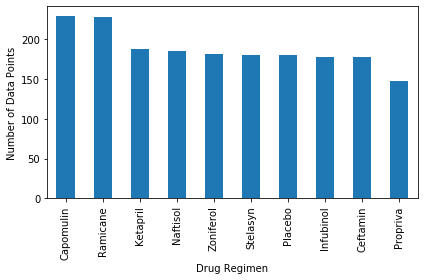

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
num_mice = summary_stats["Mouse ID"].count()
#matching the sample output
num_mice = num_mice.sort_values(ascending=False)
mice_chart = num_mice.plot(kind="bar")
mice_chart.set_xlabel("Drug Regimen")
mice_chart.set_ylabel("Number of Data Points")
plt.tight_layout()

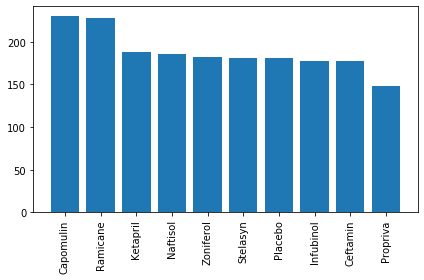

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", 
         #"Placebo", "Infubinol", "Ceftamin", "Propriva"]

#eventually realized that the index function would perfectly match the drugs to the mouse count 
#otherwise the ticks are a monstrosity of trying to fit every instance of every drug onto the graph
drugs = num_mice.index

#able to avoid numpy by using the range and len functions
x_axis = range(len(summary_stats))
tick_location = [value for value in x_axis]

plt.bar(x_axis, num_mice, align="center")
plt.xticks(tick_location, drugs, rotation="vertical")
plt.tight_layout()

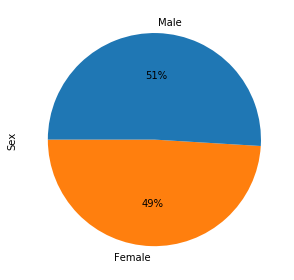

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = combine_data.groupby(["Sex"])
num_mice1 = gender["Mouse ID"].count()
colors = ["#ff7f0e", "#1f77b4"]

gender_chart = num_mice1.plot(kind="pie", colors = colors, autopct="%1.0f%%", startangle=180)
#wasn't entirely sure how to both round the autopct and get it to display sigfigs 
gender_chart.set_ylabel("Sex")
plt.tight_layout()

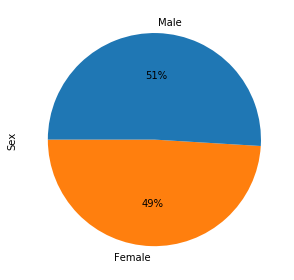

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#again use index to accurately display the number (or rather percentage) of mice by sex
labels = num_mice1.index
colors = ["#ff7f0e", "#1f77b4"]

plt.pie(num_mice1, labels=labels, colors=colors, autopct="%1.0f%%", startangle=180)
plt.ylabel("Sex")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#use loc to isolate the 4 regimens we care about
treatment = combine_data.loc[(combine_data["Drug Regimen"] == "Capomulin") | (combine_data["Drug Regimen"] == "Ramicane")
                             | (combine_data["Drug Regimen"] == "Infubinol") | (combine_data["Drug Regimen"] == "Ceftamin")]

#it is necessary to sort the timepoint values in conjunction with using drop_duplicates below
treatment = treatment.sort_values(by= ["Timepoint"])

# Start by getting the last (greatest) timepoint for each mouse
#treatment = treatment.groupby(["Mouse ID"]).tail(1) was my first attempt but the data were not matching the sample output

#after the data is sorted, keep only the last (largest) timepoint value for any given mouse
treatment = treatment.drop_duplicates(["Mouse ID"], keep="last")

#create a new column for the new data frame that will copy over this last timepoint value
treatment["Final Timepoint"] = treatment["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_data = pd.merge(combine_data, treatment)

#dropping the columns we don't need, although this isn't strictly needed
#but it is easier to display the data frame after (which was not required)
del new_data["Sex"]
del new_data["Age_months"]
del new_data["Weight (g)"]
del new_data["Timepoint"]
del new_data["Metastatic Sites"]
new_data.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Final Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
2,a275,Ceftamin,62.999356,45
3,a411,Ramicane,38.407618,45
4,a444,Ramicane,43.047543,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# Calculate the IQR and quantitatively determine if there are any potential outliers.
#use a for loop, for each iteration we will locate the data for the pretinent drug regimen 
#the data for tumor volume for all the rows of that drug will be stored in the empty list we made
for x in treatments:
    box = new_data.loc[(new_data["Drug Regimen"] == x)]
    tumor_data.append(box["Tumor Volume (mm3)"])
    
    #then calculate the quartiles, and use those to calculate the lower quartile, the upper quartile, the iqr
    #and use those to calculate the upper and lower bounds, which in turn can be used to calculate outliers
    quartiles = box["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = upperq - lowerq
    lowerbound = round(lowerq - (1.5*iqr),2)
    upperbound = round(upperq + (1.5*iqr),2)
    # Determine outliers using upper and lower bounds
    outlier = new_data.loc[((new_data["Tumor Volume (mm3)"] > upperbound) | (new_data["Tumor Volume (mm3)"] < lowerbound))]
    outliers = outlier["Tumor Volume (mm3)"]
    print(f"Any potential outliers for the {x} regimen will lie above {upperbound} mm3 or below {lowerbound} mm3\n")
    #not sure how to format this so that the first row isn't slightly indented
    print(f"The outlier(s) of the {x} regimen is/are\n {outliers}\n")
    



Any potential outliers for the Capomulin regimen will lie above 51.83 mm3 or below 20.71 mm3

The outlier(s) of the Capomulin regimen is/are
 0     67.973419
1     65.525743
2     62.999356
6     57.031862
8     66.083066
11    56.057749
13    55.742829
14    72.226731
18    60.969711
20    62.435404
22    60.918767
31    67.289621
36    61.849023
39    68.923185
41    66.196912
42    62.117279
43    67.748662
44    57.918381
47    59.851956
48    64.299830
55    60.165180
56    59.741901
57    55.629428
59    61.433892
60    54.656549
61    64.192341
69    55.650681
75    52.925348
80    54.048608
84    67.527482
86    58.268442
91    64.634949
92    61.386660
93    67.685569
95    68.594745
97    64.729837
99    62.754451
Name: Tumor Volume (mm3), dtype: float64

Any potential outliers for the Ramicane regimen will lie above 54.31 mm3 or below 17.91 mm3

The outlier(s) of the Ramicane regimen is/are
 0     67.973419
1     65.525743
2     62.999356
6     57.031862
8     66.083066
11  

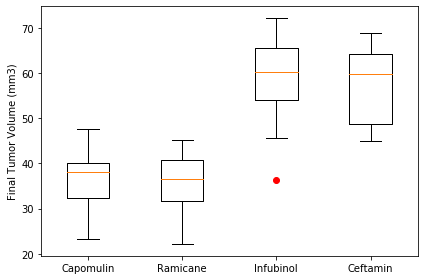

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
#use sym to customize the appearance of any outliers on the boxplot 
ax1.boxplot(tumor_data, sym="red")
#couldn't get the ticks labeled properly with list comprehension, so it was done by hand
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.tight_layout()  
#not exactly sure why the boxplot function is so lenient with outliers since as calculated above
#there are many values that fall outside of the lower and upper bounds for all drug regimen data

## Line and Scatter Plots

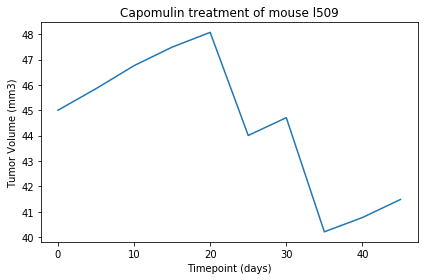

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#choosing mouse l509 since that was the sample output
#locate mouse l509 and sort the timepoint values for that mouse
#then create a line chart
mouse_line = combine_data.loc[(combine_data ["Mouse ID"] == "l509")]
mouse_line = mouse_line.sort_values(by= ["Timepoint"])
x_axis= mouse_line["Timepoint"]
y_axis= mouse_line["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.tight_layout()

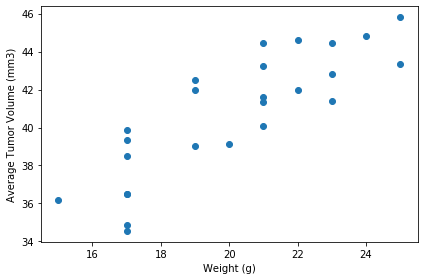

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#locate all the data for the drug Capomulin
mouse_scatter = combine_data.loc[(combine_data["Drug Regimen"] == "Capomulin")]

#group the data by mice, so we can calculate the average tumor volume per mice of given weights
#use the mean function for both weight and volume as the chart will fail to generate otherwise
mouse_scatter = mouse_scatter.groupby(["Mouse ID"])
weight = mouse_scatter["Weight (g)"].mean()
avg = mouse_scatter["Tumor Volume (mm3)"].mean()

plt.scatter(weight, avg)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.tight_layout()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


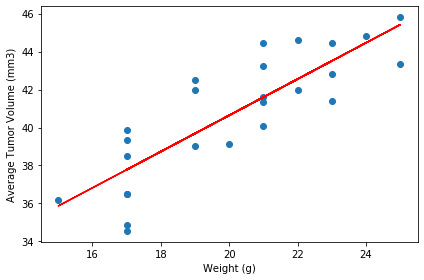

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#use the pearson correlation coefficient function
corr = st.pearsonr(weight, avg)
correlate = round(corr[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlate}")

#import linregress and using its arguments to do most of the work for us
from scipy.stats import linregress

#the chart will essentially be the same as the one before, we're just adding a regression line
plt.scatter(weight, avg)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,regress_values,"r-")

#print(f"The regression line is {line_eq}") was not required
rsquare = round(correlate**2,2)
#print(f"{rsquare}")
#the r squared value is 0.71, which means that the correlation is above average in strength
plt.tight_layout()